In [66]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

In [ ]:
now =  datetime.now().strftime('%Y-%m-%d')
Apple = yf.download("AAPL", start= "2020-01-01", end= now)

In [ ]:
ticker=("SPY", "AAPL", "KO", "MSFT")
stocks = yf.download(ticker, start="2020-01-01", end=now)
stocks.to_csv("Stocks.csv")

In [ ]:
# The header serves to define multiple levels of column headers from the CSV file. 
stocks =  pd.read_csv("Stocks.csv", header=[0,1], index_col=[0], parse_dates=[0]) # index_col is used tio delet the first column in our example is colled the index.
stocks

In [ ]:
stocks.columns = stocks.columns.to_flat_index()
stocks.columns

In [ ]:
# Dans cette case l'objectif est d'avoir plusieur niveaux d'indexation.
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks

In [ ]:
stocks.describe()

In [102]:
# Stoker seulement la fermeture des actions dans la variable close.
close = stocks.loc[:,"Close"].copy()
close

,AAPL,KO,MSFT,SPY
Date,,,,
2020-01-02,75.087502,54.990002,160.619995,324.869995
2020-01-03,74.357498,54.689999,158.619995,322.410004
2020-01-06,74.949997,54.669998,159.029999,323.640015
2020-01-07,74.597504,54.250000,157.580002,322.730011
2020-01-08,75.797501,54.349998,160.089996,324.450012
...,...,...,...,...
2024-12-10,247.770004,62.910000,443.329987,602.799988
2024-12-11,246.490005,62.639999,448.989990,607.460022
2024-12-12,247.960007,63.840000,449.559998,604.330017


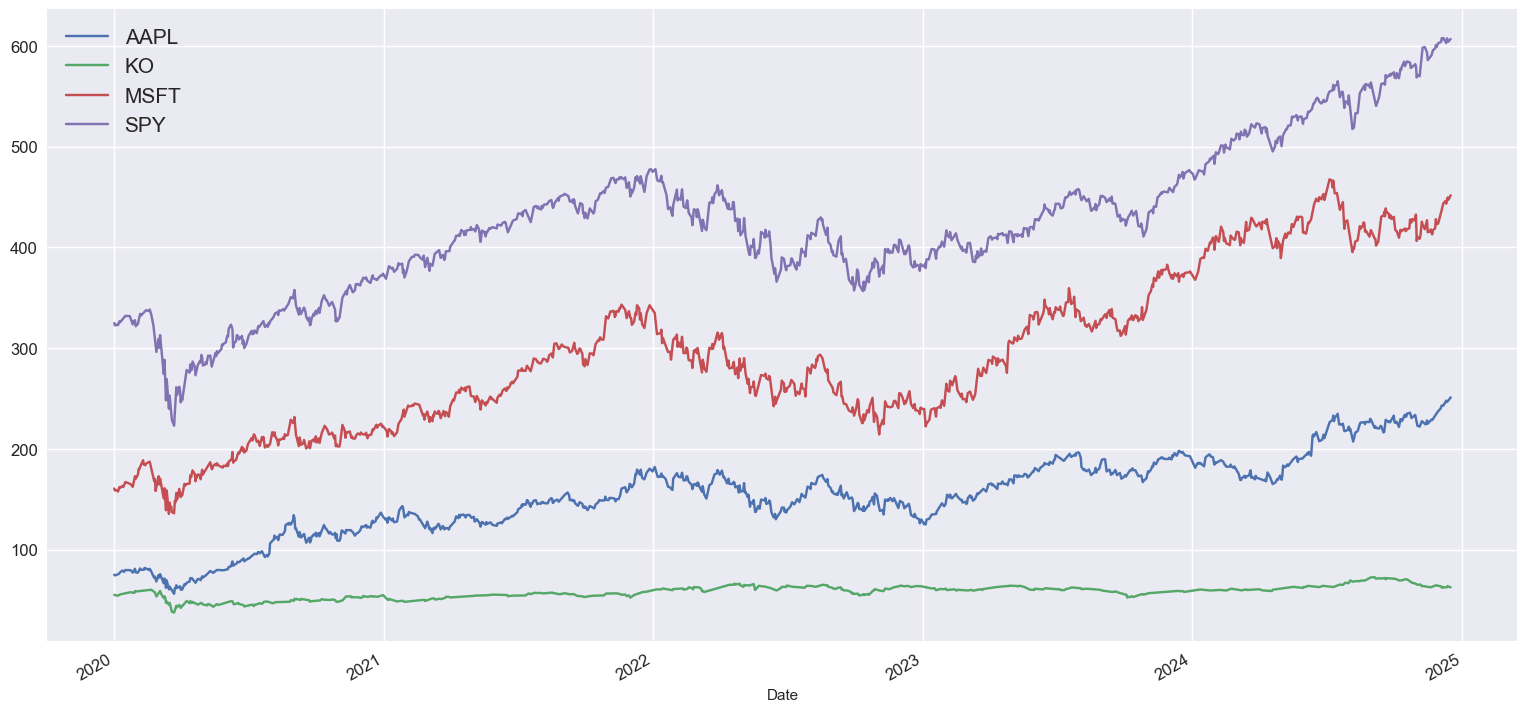

In [88]:
# Plot le graphe des actions notamment leurs prix de fermeture dans la bourse
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")


close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=15)
plt.show()


In [89]:
close.iloc[0,0]

np.float64(75.0875015258789)

In [100]:
# Normaliser les données.
close.AAPL.div(close.iloc[0,0]).mul(100)

Date
2020-01-02    100.000000
2020-01-03     99.027796
2020-01-06     99.816874
2020-01-07     99.347431
2020-01-08    100.945562
                 ...    
2024-12-10    329.975028
2024-12-11    328.270352
2024-12-12    330.228069
2024-12-13    330.454470
2024-12-16    334.329933
Name: AAPL, Length: 1248, dtype: float64

In [101]:
close.div(close.iloc[0]).mul(100)

,AAPL,KO,MSFT,SPY
Date,,,,
2020-01-02,100.000000,100.000000,100.000000,100.000000
2020-01-03,99.027796,99.454441,98.754825,99.242777
2020-01-06,99.816874,99.418070,99.010088,99.621393
2020-01-07,99.347431,98.654298,98.107338,99.341280
2020-01-08,100.945562,98.836146,99.670029,99.870723
...,...,...,...,...
2024-12-10,329.975028,114.402615,276.011705,185.551143
2024-12-11,328.270352,113.911616,279.535552,186.985573
2024-12-12,330.228069,116.093832,279.890432,186.022109


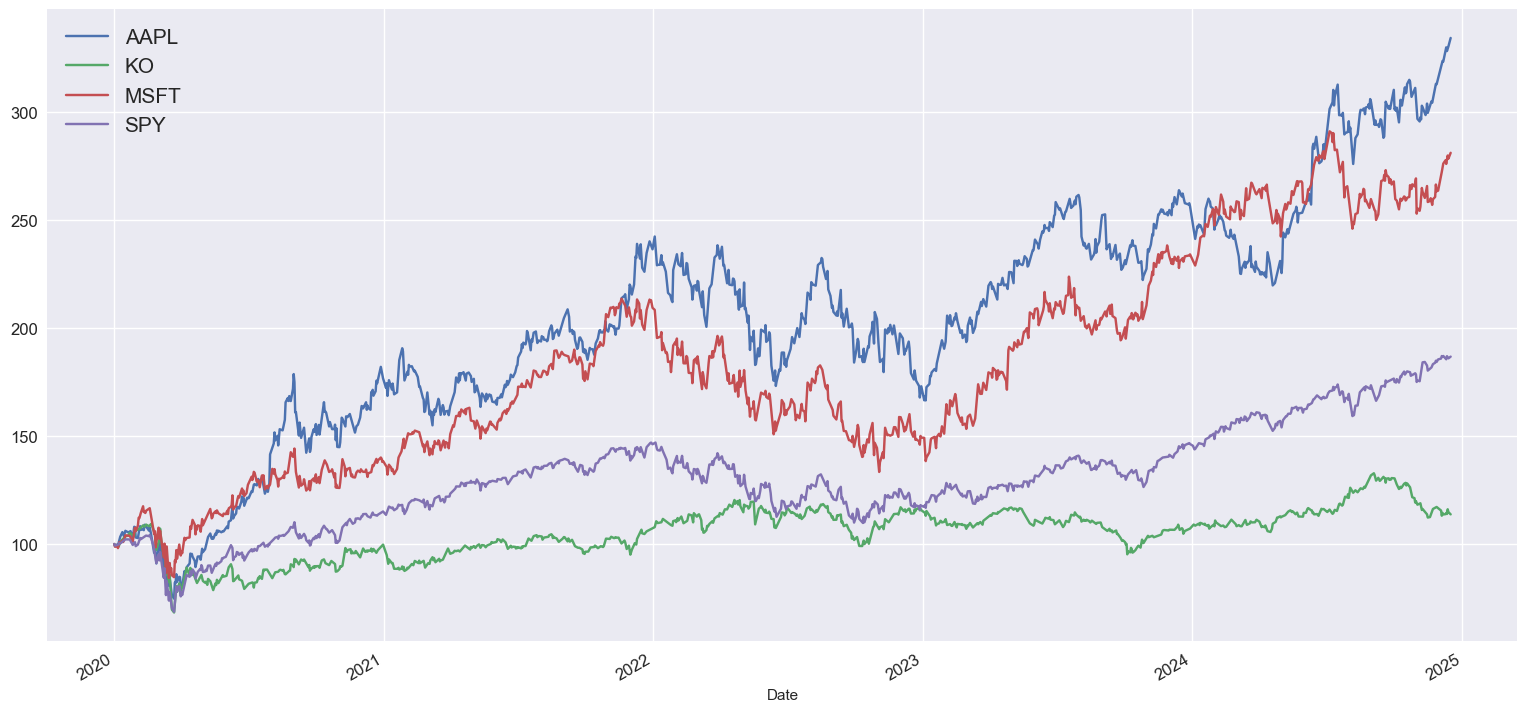

In [103]:
normalclose = close.div(close.iloc[0]).mul(100)
normalclose.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=15)
plt.show()